In [49]:
import pandas as pd
import nltk
nltk.download('punkt') # Used for sentence tokenizer
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [51]:
data= pd.read_csv('/content/spam.csv', encoding='latin-1')#engine='python')
data

v1  ... Unnamed: 4
0      ham  ...        NaN
1      ham  ...        NaN
2     spam  ...        NaN
3      ham  ...        NaN
4      ham  ...        NaN
...    ...  ...        ...
5567  spam  ...        NaN
5568   ham  ...        NaN
5569   ham  ...        NaN
5570   ham  ...        NaN
5571   ham  ...        NaN

[5572 rows x 5 columns]

In [52]:
data.isna().sum

<bound method DataFrame.sum of          v1     v2  Unnamed: 2  Unnamed: 3  Unnamed: 4
0     False  False        True        True        True
1     False  False        True        True        True
2     False  False        True        True        True
3     False  False        True        True        True
4     False  False        True        True        True
...     ...    ...         ...         ...         ...
5567  False  False        True        True        True
5568  False  False        True        True        True
5569  False  False        True        True        True
5570  False  False        True        True        True
5571  False  False        True        True        True

[5572 rows x 5 columns]>

In [ ]:
data['Unnamed: 2'].isna().sum
data['Unnamed: 3'].isna().sum
data['Unnamed: 4'].isna().sum 

<bound method Series.sum of 0       True
1       True
2       True
3       True
4       True
        ... 
5567    True
5568    True
5569    True
5570    True
5571    True
Name: Unnamed: 4, Length: 5572, dtype: bool>

In [55]:
#get necessary columns for processing

data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data =data.rename(columns={'v1': 'label','v2': 'messages'})
data.head()

label                                           messages
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

# **Data_Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


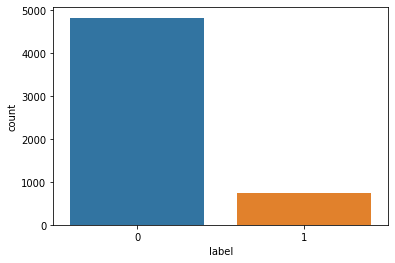

In [45]:
sns.countplot(data['label'])

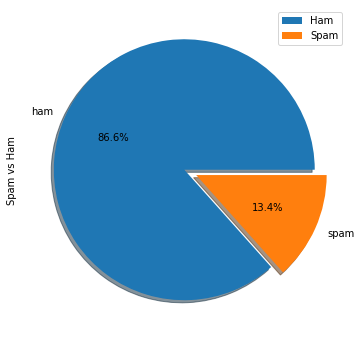

In [56]:
data['label'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel('Spam vs Ham')
plt.legend(['Ham', 'Spam'])
plt.show()

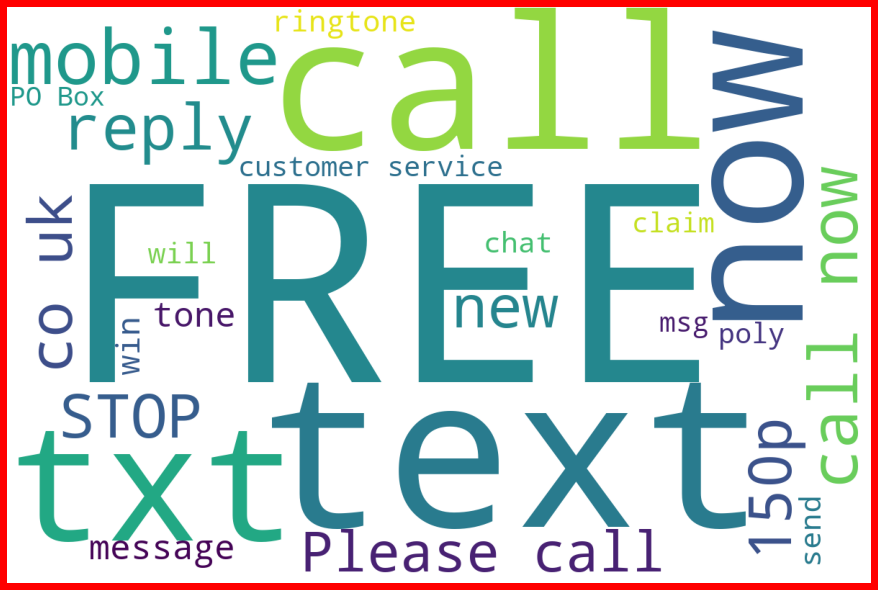

In [50]:
#Getting sense of loud words in spam
from wordcloud import WordCloud

spams=data['messages'][data['label']==1]
spamcloud=WordCloud(width=1200,height=800,background_color='white',max_words=25).generate(' '.join(spams))

plt.figure(figsize=(12,8),facecolor='r')
plt.imshow(spamcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **DATA_PREPROCESSING**

In [ ]:
labelencoder = LabelEncoder()
data['label']=labelencoder.fit_transform(data['label'])
data

In [57]:
#check for null values
data.isnull().sum

<bound method DataFrame.sum of       label  messages
0     False     False
1     False     False
2     False     False
3     False     False
4     False     False
...     ...       ...
5567  False     False
5568  False     False
5569  False     False
5570  False     False
5571  False     False

[5572 rows x 2 columns]>

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
#another way of cleaning data


#def clean_text(text):
  #text =text.lower()
  #text =re.sub(r'0-9a-zA-Z',' ',str(data)) #appart from 0-9, a-z, A-Z all the special charecter should be replaced with ' '
  #text =re.sub(r'^\s+|\s+?', '',str(data))
  #text =re.sub(r'$', 'money', str(data))
  #text = " ".join(word for word in text.split() if word not in stop_words)
  #for i in text :
    #text=word_tokenize(i)
  #return text 

In [ ]:
#data['messages'] = data['messages'].apply(clean_text)   
#data.head() 

In [ ]:
import string

messages=[]

messages = list()
lines= data['messages'].values.tolist()

for line in lines:   
    tokens = word_tokenize(line)
    # convert to lower case
    tokens = [w.lower() for w in tokens]

    # remove punctuation from each word    
    table = str.maketrans('', '', string.punctuation)
    #Replace the characters in the first argument with the corresponding characters in the second argument
    #Third argument represents a string of characters that must be removed from the original string
    stripped = [w.translate(table) for w in tokens]

    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()] #.isalpha returns True if the chaarcters are aphabets

    # filter out stop words    
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    messages.append(words)

In [ ]:
import gensim # Process plain text 

EMBEDDING_DIM = 70
# train word2vec model
model = gensim.models.Word2Vec(sentences=messages, size=EMBEDDING_DIM, window=5, min_count=1)
'''
size : Number of dimensions of the embeddings
window : sliding window size
min_count : Minimum count of words to consider while training a model. Default is 5
'''
# vocab size
words = list(model.wv.vocab) # wv is the object that contain mappings between words and embeddings
print('Vocabulary size: %d' % len(words))

Vocabulary size: 7746


In [ ]:
filename = 'sms_spam_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [ ]:
import os

embeddings_index = {}
f = open('/content/sms_spam_word2vec.txt')
for line in f:
  print(line)
  values = line.split()
  #print(values)
  word = values[0]
  coefs = np.asarray(values[1:])
  embeddings_index[word] = coefs
f.close()


7746 70

u -0.1522593 0.36712992 1.1226288 0.29447994 -0.31899875 1.1405292 0.41627052 0.35542235 0.4896973 -0.871466 -0.40209904 0.5788152 0.3147114 -0.506265 -0.3560025 -0.90438795 0.90345204 -1.065301 0.10801679 -0.79302835 -0.7324811 -0.89217055 0.04778712 0.18771236 -0.46980128 -0.01422319 0.048497703 0.112014465 0.19396845 0.40975016 -0.5364683 -0.08261199 0.42187876 0.08367741 -0.5603066 0.8018359 -0.18049085 0.9990794 0.24264003 0.058180686 -1.3371904 0.0517681 -1.3245074 0.36522973 -0.9968741 -0.16873541 0.17412332 0.5512005 -0.85529476 0.2611769 0.6147237 -1.2464963 0.17276351 0.26618898 0.5285912 0.112160765 0.6748341 0.5921021 -0.5617696 -0.30771604 0.54131186 -0.36495206 0.69015986 -0.00068258477 -0.008978342 0.1805028 0.061432224 0.05420315 -0.5563322 0.8712939

call -0.14029977 0.32451364 0.9940907 0.24677798 -0.28279623 1.0095341 0.3617866 0.30373535 0.41689885 -0.75314987 -0.34791186 0.4944683 0.2948026 -0.4422191 -0.3076138 -0.78539616 0.78982174 -0.9290565 0.08857563

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



agalla -0.00474328 0.010648992 0.037381027 0.008627892 -0.004707958 0.039064333 0.008431251 0.01442985 0.016244134 -0.027104164 -0.010172883 0.013194675 0.016107462 -0.009131447 -0.008310732 -0.034422368 0.021324754 -0.031170791 0.0017951455 -0.024415001 -0.017927941 -0.021714477 0.0019458156 0.00382968 -0.0075625377 -0.00716357 -0.0049265814 0.009735092 -0.00022865325 0.010670502 -0.012724383 0.0040352955 0.016315041 0.0027677862 -0.018861225 0.027252339 -0.010425008 0.025416575 0.0059998734 0.002078766 -0.03519396 -0.0016637155 -0.039207835 0.015923057 -0.027791781 0.0018935287 0.011573316 0.01856093 -0.02069962 0.0023373505 0.015365759 -0.031576738 0.008069644 0.005040914 0.019490384 0.005564634 0.020167109 0.022038028 -0.011900349 -0.012528172 0.022091977 -0.011355167 0.023153493 -0.0053110006 0.0043188944 0.011257267 0.003544194 -0.0041830894 -0.013098199 0.02251207

xxxxx -0.008863622 0.0053112237 0.021650063 0.0004140052 0.0010660047 0.008222687 0.0027661752 0.000946954 0.011773

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
embeddings_index

{'7746': array(['70'], dtype='<U2'),
 'u': array(['-0.1522593', '0.36712992', '1.1226288', '0.29447994',
        '-0.31899875', '1.1405292', '0.41627052', '0.35542235',
        '0.4896973', '-0.871466', '-0.40209904', '0.5788152', '0.3147114',
        '-0.506265', '-0.3560025', '-0.90438795', '0.90345204',
        '-1.065301', '0.10801679', '-0.79302835', '-0.7324811',
        '-0.89217055', '0.04778712', '0.18771236', '-0.46980128',
        '-0.01422319', '0.048497703', '0.112014465', '0.19396845',
        '0.40975016', '-0.5364683', '-0.08261199', '0.42187876',
        '0.08367741', '-0.5603066', '0.8018359', '-0.18049085',
        '0.9990794', '0.24264003', '0.058180686', '-1.3371904',
        '0.0517681', '-1.3245074', '0.36522973', '-0.9968741',
        '-0.16873541', '0.17412332', '0.5512005', '-0.85529476',
        '0.2611769', '0.6147237', '-1.2464963', '0.17276351', '0.26618898',
        '0.5285912', '0.112160765', '0.6748341', '0.5921021', '-0.5617696',
        '-0.30771604',

In [ ]:
max_length = 50

In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

VALIDATION_SPLIT = 0.2

# vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(messages)
sequences = tokenizer_obj.texts_to_sequences(messages)

In [ ]:
word_index = tokenizer_obj.word_index # Maps words to their numeric representation
print('Found %s unique tokens.' % len(word_index))

message_pad = pad_sequences(sequences, maxlen=max_length)
label =  data['label'].values
print('Shape of review tensor:', message_pad.shape)
print('Shape of sentiment tensor:', label.shape)

Found 7746 unique tokens.
Shape of review tensor: (5572, 50)
Shape of sentiment tensor: (5572,)


In [ ]:
message_pad[0]

array([ 3, 16,  1, 24,  7,  7, 18, 17,  8,  4, 11,  3, 20,  4,  6,  1,  2,
        1,  7,  7, 18, 13,  4, 12, 34, 13, 10,  3,  6,  2], dtype=int32)

In [ ]:
# split the data into a training set and a validation set
indices = np.arange(message_pad.shape[0])
print(indices)
#print(len(indices))
np.random.shuffle(indices)
print(indices)
#print(len(indices))


[   0    1    2 ... 5569 5570 5571]
[2631  616 4837 ... 4938  342  834]


In [ ]:
message_pad = message_pad[indices]
label = label[indices]
num_validation_samples = int(VALIDATION_SPLIT * message_pad.shape[0])

In [ ]:
X_train_pad = message_pad[:-num_validation_samples]
y_train = label[:-num_validation_samples]
X_test_pad = message_pad[-num_validation_samples:]
y_test = label[-num_validation_samples:]

In [ ]:
print('Shape of X_train_pad tensor:', X_train_pad.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of X_test_pad tensor:', X_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of X_train_pad tensor: (4458, 50)
Shape of y_train tensor: (4458,)
Shape of X_test_pad tensor: (1114, 50)
Shape of y_test tensor: (1114,)


In [ ]:
EMBEDDING_DIM =70
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# **Model_building**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

# define model
model = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model.add(embedding_layer)
model.add(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 70)            542290    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                13184     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 555,507
Trainable params: 13,217
Non-trainable params: 542,290
_________________________________________________________________
None


In [ ]:
model.fit(X_train_pad, y_train, batch_size=128, epochs=25, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/25
35/35 - 29s - loss: 0.5314 - accuracy: 0.7761 - val_loss: 0.4310 - val_accuracy: 0.8609
Epoch 2/25
35/35 - 3s - loss: 0.4107 - accuracy: 0.8672 - val_loss: 0.4073 - val_accuracy: 0.8609
Epoch 3/25
35/35 - 3s - loss: 0.3932 - accuracy: 0.8672 - val_loss: 0.4077 - val_accuracy: 0.8609
Epoch 4/25
35/35 - 3s - loss: 0.3934 - accuracy: 0.8672 - val_loss: 0.4043 - val_accuracy: 0.8609
Epoch 5/25
35/35 - 3s - loss: 0.3918 - accuracy: 0.8672 - val_loss: 0.4045 - val_accuracy: 0.8609
Epoch 6/25
35/35 - 3s - loss: 0.3916 - accuracy: 0.8672 - val_loss: 0.4051 - val_accuracy: 0.8609
Epoch 7/25
35/35 - 3s - loss: 0.3930 - accuracy: 0.8672 - val_loss: 0.4038 - val_accuracy: 0.8609
Epoch 8/25
35/35 - 3s - loss: 0.3918 - accuracy: 0.8672 - val_loss: 0.4050 - val_accuracy: 0.8609
Epoch 9/25
35/35 - 3s - loss: 0.3920 - accuracy: 0.8672 - val_loss: 0.4042 - val_accuracy: 0.8609
Epoch 10/25
35/35 - 3s - loss: 0.3918 - accuracy: 0.8672 - val_loss: 0.4042 - val_accuracy: 0.8609
Epoch 11/25
35/35 

In [ ]:
model.save_weights('Sentiment_Classifier_word2vec_first_try.h5')

In [ ]:
score, acc = model.evaluate(X_test_pad, y_test, batch_size=128)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy: {0:.2%}".format(acc))

9/9 [==============================] - 0s 13ms/step - loss: 0.4040 - accuracy: 0.8609
Test score: 0.4040496349334717
Test accuracy: 0.8608617782592773
Accuracy: 86.09%


In [ ]:
from keras.models import load_model
from keras.models import model_from_json

In [ ]:
with open('model_architecture_Sentiment_classifier_word2vec_first_try.json','w') as f:
    f.write(model.to_json())

In [ ]:
model.load_weights('/content/Sentiment_Classifier_word2vec_first_try.h5')

In [43]:
test_sample_1 = "free entries for 2 days"
test_sample_2 = "hey, sumita, where are you been?"

test_samples = [test_sample_1, test_sample_2]

test_samples_tokens = tokenizer_obj.texts_to_sequences(test_samples)
test_samples_tokens_pad = pad_sequences(test_samples_tokens, maxlen=max_length)

model.predict(x=test_samples_tokens_pad)

array([[0.15043086],
       [0.1548813 ]], dtype=float32)

In [ ]:
#let us check how the model predicts
classes = model.predict(X_test_pad[:10], batch_size=128)
for i in range (10):
    if(classes[i] > 0.5 and y_test[i] == 1 or (classes[i] <= 0.5 and y_test[i] == 0)):
        print( classes[i], y_test[i], " Right prdiction")
    else :
        print( classes[i], y_test[i], " Wrong prdiction")